# 単純パーセプトロン

機械学習は実際にどのようなことを行なっているのか、その様子を知るために、
単純パーセプトロンと呼ばれる簡単な機械学習手法を実際に自分で実装してみよう。

In [1]:
import matplotlib.pyplot as plt
import numpy as np

分類したいデータは以下のものとする。説明変数が2つあり、2クラス1,-1に分類する。サンプル数は3。
`numpy`の配列を用いてデータを管理する。

In [2]:
x=np.array([[1.1,0.1],[1.9,3.1],[1.8,0.8]])
y=np.array([1,1,-1],dtype=int)

In [3]:
print(x)

[[ 1.1  0.1]
 [ 1.9  3.1]
 [ 1.8  0.8]]


In [4]:
print(x[:,0])

[ 1.1  1.9  1.8]


In [5]:
print(x[:,1])

[ 0.1  3.1  0.8]


In [6]:
print(x[0])

[ 1.1  0.1]


In [7]:
print(x[1])

[ 1.9  3.1]


In [8]:
print(x[2])

[ 1.8  0.8]


データを散布図にプロットしてみる。`matplotlib.pyplot`の`scatter`メソッドで散布図を描ける。

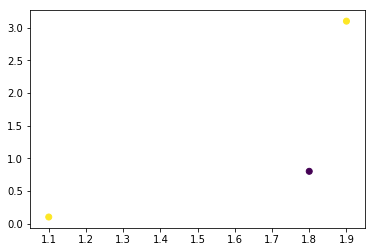

In [9]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

この三つのデータを
$$
b+w_0x_0+w_1x_1=0
$$
という式で表される直線で分類するため、パラメータ$b, w_0, w_1$の値を決定しよう。

$b+w_0x_0+w_1x_1>0$ならクラス$y=1$であり、
$b+w_0x_0+w_1x_1<0$ならクラス$y=-1$である、というように分類する。
この直線の式は
$$
x_1=-\frac{1}{w_1}(b+w_0x_0)
$$
とも書ける。

まずは見た目で適当に直線のパラメータを決めてみよう。

`np.linspace`は等間隔に数値が並んだ配列を出力する。曲線のグラフを描くときなどに便利。
また`numpy`の配列は`+`や`*`などで要素ごとの計算をしてくれる。

In [10]:
seq=np.linspace(0,1,10)
print(seq)
print(seq+1)
print(seq*3)

[ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ]
[ 1.          1.11111111  1.22222222  1.33333333  1.44444444  1.55555556
  1.66666667  1.77777778  1.88888889  2.        ]
[ 0.          0.33333333  0.66666667  1.          1.33333333  1.66666667
  2.          2.33333333  2.66666667  3.        ]


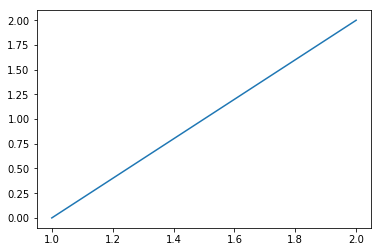

In [11]:
w=np.array([-2.0,1.0])
b=2.0

x0=np.linspace(1,2,2)
x1=-(b+w[0]*x0)/w[1]
plt.plot(x0,x1)
plt.show()

サンプルの散布図と直線を重ねて表示する

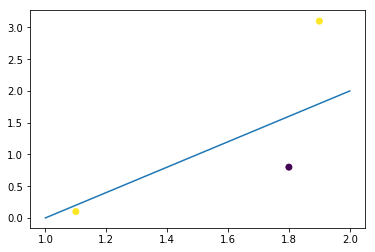

In [12]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(x0,x1)
plt.show()

判別直線をプロットしてくれる関数を作っておく。

In [13]:
def plotline(w,b,plt):
    x0=np.linspace(1,2,2)
    x1=-(b+w[0]*x0)/w[1]
    plt.plot(x0,x1)

先ほどと同じ動作のコードを今定義した関数`plotline`を用いて書き直したもの。

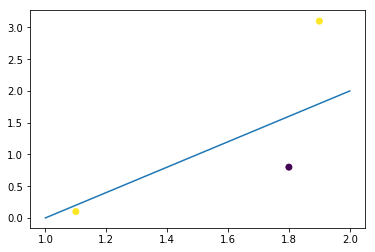

In [14]:
plt.scatter(x[:,0],x[:,1],c=y)
w=np.array([-2.0,1.0])
b=2.0
plotline(w,b,plt)
plt.show()

さて、いま適当にパラメータを決めた直線でうまく分類できているか？

この直線の式は$2.0-2.0x_0+1.0x_1=0$である。
この左辺を判別関数と呼ぶことにする。

直線で分割された領域は上の方が判別関数の値が正、下の方が判別関数の値が負の領域。
従って、左下にあるサンプルは誤判別、右のほうにある二つのサンプルは正しく判別されている。

この直線がもう少し下にあれば全て正しく判別できそう。
どのように`b, w`の値を変えればよいか考え、下のコードで実験してみよう。

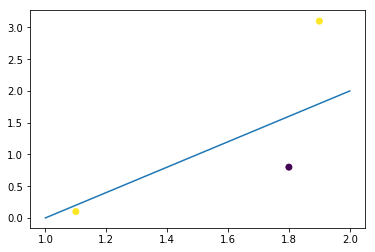

In [15]:
plt.scatter(x[:,0],x[:,1],c=y)
w=np.array([-2.0,1.0])
b=2.0
plotline(w,b,plt)
plt.show()

パラメータを変えてうまく判別できるようにするという部分を、プログラムに自動的に行わせたい。そのために、正しく判別されているか計算する関数を定義しよう。

判別関数$b+w_0x_0+w_1x_1$の値が正なら$1$、値が負なら$-1$のクラスに分類される。
従って判別関数$b+w_0x_0+w_1x_1$と$y$の積が正なら正しく判別、負なら誤判別ということになる。

In [16]:
def predict(x,w,b):
    if b+w.dot(x)>0:
        return 1
    else:
        return -1

In [17]:
w=np.array([-2.0,1.0])
b=2.0
print(predict(x[0],w,b), predict(x[1],w,b), predict(x[2],w,b))

-1 1 -1


パラメータをどのように更新していくか、ここでは次のように考える。

$y(b+w_0x_0+w_1x_1)$の値が全て正の数になればよいので、誤判別されたサンプルを元にこの式の値が大きくなるように$b, w$を書き換えればよい。
例えば
$$
b\to b+y\\
w_0\to w_0+yx_0\\
w_1\to w_1+yx_1
$$
としてみる。

すると
$$
y(b+y+w_0x_0+x_0^2+w_1x_1+x_1^2)=y(b+w_0x_0+w_1x_1)+y^2(1+x_0^2+x_1^2)
$$
となるので、このサンプルに関しては判別関数の値は大きくなる。

これをすべてのサンプルについて行うことで、すべてのサンプルについて判別関数の値が正になるかどうか見ていく。

改めて状況を確認する。

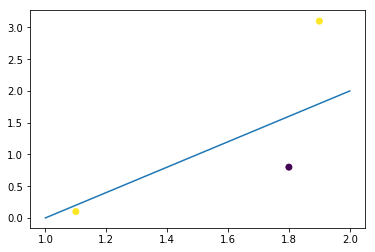

-1 1 -1


In [18]:
plt.scatter(x[:,0],x[:,1],c=y)
w=np.array([-2.0,1.0])
b=2.0
plotline(w,b,plt)
plt.show()
print(predict(x[0],w,b), predict(x[1],w,b), predict(x[2],w,b))

$x[0]$が誤判別なので、先ほどのルールに従ってパラメータ`w,b`を更新する。

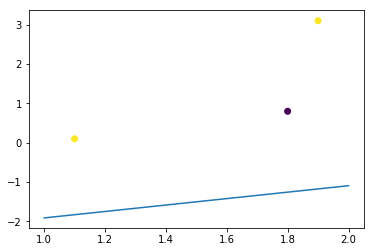

In [19]:
w=w+x[0]
b=b+1
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [20]:
print(predict(x[0],w,b), predict(x[1],w,b), predict(x[2],w,b))

1 1 1


$x[2]$が誤判別

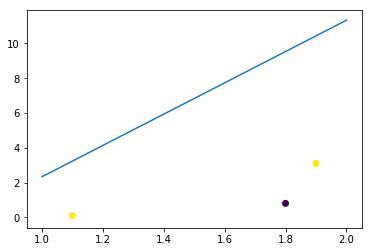

In [21]:
w=w-x[2]
b=b-1
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [22]:
print(predict(x[0],w,b), predict(x[1],w,b), predict(x[2],w,b))

-1 -1 -1


$x[0],x[1]$が誤判別

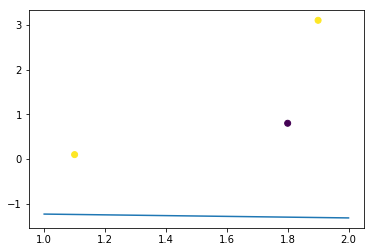

In [23]:
w=w+x[0]+x[1]
b=b+1+1
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [24]:
print(predict(x[0],w,b), predict(x[1],w,b), predict(x[2],w,b))

1 1 1


パラメータの更新を自動で行ってくれる関数を定義しよう。
x,yには一つのサンプルの値を代入し、正しく分類されていれば何もしない、誤分類されていれば上で定めたルールに従ってパラメータを更新する。

In [25]:
def update(x,y,w,b):
    if predict(x,w,b)==y:
        pass
    else:
        w,b=w+x*y,b+y
    return w,b

同じ操作を繰り返すので、for文を使う。
3つのデータについて順番にパラメータを更新していく。

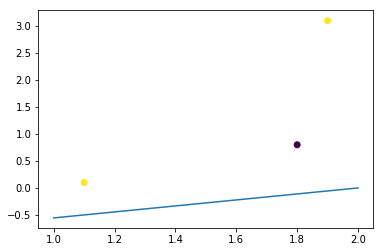

[1, 1, 1]


In [26]:
for i in range(3):
    w,b=update(x[i],y[i],w,b)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print([predict(x[i],w,b) for i in range(3)])

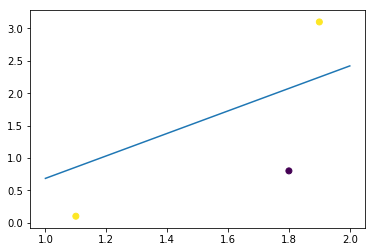

[-1, 1, -1]


In [27]:
for i in range(3):
    w,b=update(x[i],y[i],w,b)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print([predict(x[i],w,b) for i in range(3)])

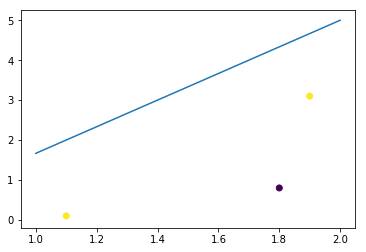

[-1, -1, -1]


In [28]:
for i in range(3):
    w,b=update(x[i],y[i],w,b)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print([predict(x[i],w,b) for i in range(3)])

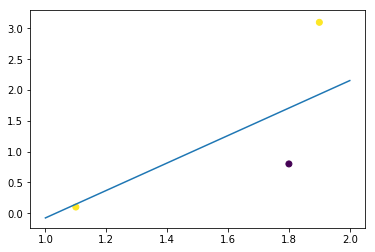

[-1, 1, -1]


In [29]:
for i in range(3):
    w,b=update(x[i],y[i],w,b)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print([predict(x[i],w,b) for i in range(3)])

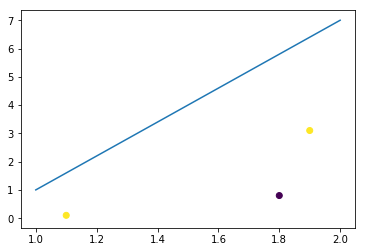

[-1, -1, -1]


In [30]:
for i in range(3):
    w,b=update(x[i],y[i],w,b)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print([predict(x[i],w,b) for i in range(3)])

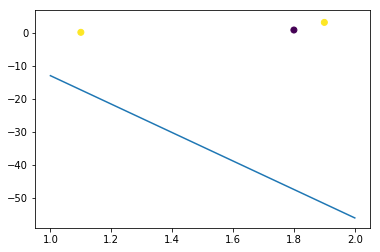

[-1, -1, -1]


In [31]:
for i in range(3):
    w,b=update(x[i],y[i],w,b)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print([predict(x[i],w,b) for i in range(3)])

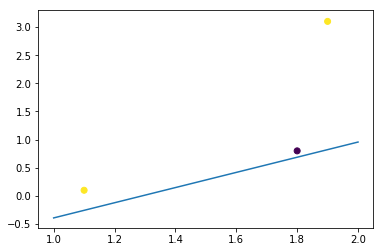

[1, 1, 1]


In [32]:
for i in range(3):
    w,b=update(x[i],y[i],w,b)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print([predict(x[i],w,b) for i in range(3)])

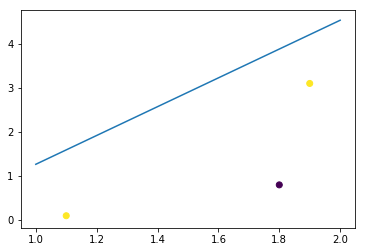

[-1, -1, -1]


In [33]:
for i in range(3):
    w,b=update(x[i],y[i],w,b)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print([predict(x[i],w,b) for i in range(3)])

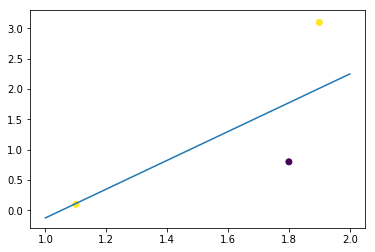

[-1, 1, -1]


In [34]:
for i in range(3):
    w,b=update(x[i],y[i],w,b)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print([predict(x[i],w,b) for i in range(3)])

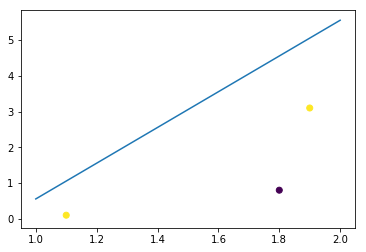

[-1, -1, -1]


In [35]:
for i in range(3):
    w,b=update(x[i],y[i],w,b)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print([predict(x[i],w,b) for i in range(3)])

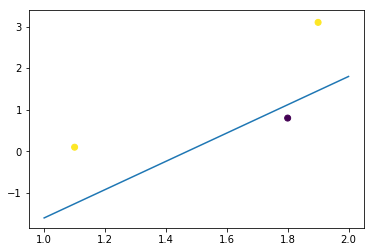

[1, 1, -1]


In [36]:
for i in range(3):
    w,b=update(x[i],y[i],w,b)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print([predict(x[i],w,b) for i in range(3)])

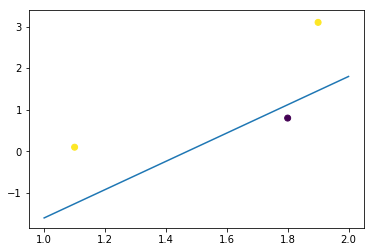

[1, 1, -1]


In [37]:
for i in range(3):
    w,b=update(x[i],y[i],w,b)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print([predict(x[i],w,b) for i in range(3)])

このようにして、完全に分類することができた。

## 学習率
最初のデータを見るとわかる通り、少しだけパラメータを変えればうまく学習できるはずである。
このパラメータの更新幅を制御するために学習率というハイパーパラメータを導入しよう

In [38]:
def update(x,y,w,b,eta):
    if predict(x,w,b)==y:
        pass
    else:
        w,b=w+eta*x*y,b+eta*y
    return w,b

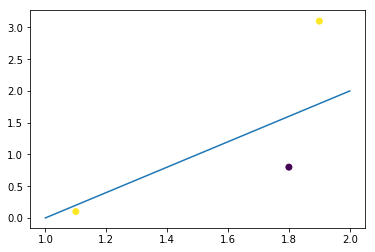

[-1, 1, -1]


In [39]:
plt.scatter(x[:,0],x[:,1],c=y)
w=np.array([-2,1])
b=2
plotline(w,b,plt)
plt.show()
print([predict(x[i],w,b) for i in range(3)])

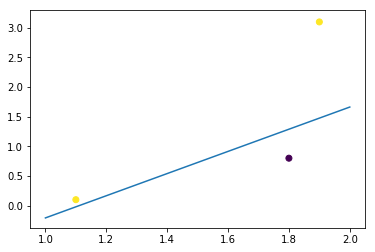

[1, 1, -1]


In [40]:
eta=0.1
for i in range(3):
    w,b=update(x[i],y[i],w,b,eta)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print([predict(x[i],w,b) for i in range(3)])

別のデータでもやってみよう。以下のような2変数、2クラス分類でサンプル数5のデータを分類することを考える。

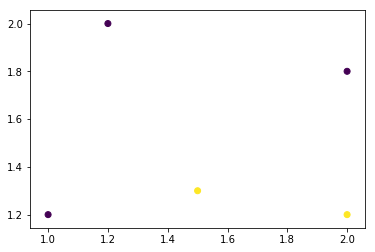

In [41]:
x, y=np.array([[1,1.2],[2,1.8],[1.2,2],[2,1.2],[1.5,1.3]]), np.array([-1,-1,-1,1,1])
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

パラメータ`b,w`の初期値は乱数で決めることにしよう。

In [42]:
b=np.random.rand(1)
w=np.random.rand(2)

In [43]:
print(b,w)

[ 0.17279469] [ 0.94772659  0.10334782]


正答率を計算させることにする。

In [44]:
s=np.array([1,1,-1,-1])
t=np.array([1,1,1,1])
print(s==t)

[ True  True False False]


In [45]:
print((s==t).sum())

2


In [46]:
def acc(x,y,w,b):
    y_pred=np.array([predict(x[i],w,b) for i in range(5)])
    return (y==y_pred).sum()/y.shape[0]

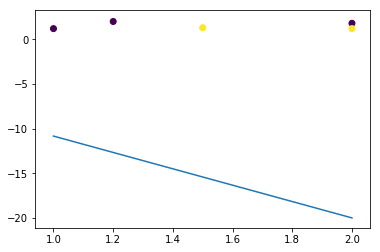

0.4


In [47]:
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print(acc(x,y,w,b))

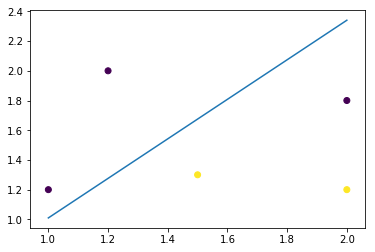

0.8


In [48]:
eta=0.1
for i in range(5):
    w,b=update(x[i],y[i],w,b,eta)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print(acc(x,y,w,b))

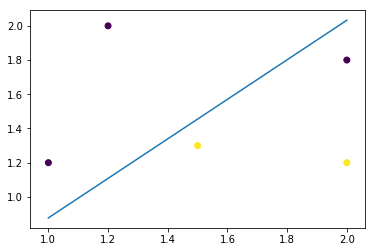

0.8


In [49]:
for i in range(5):
    w,b=update(x[i],y[i],w,b,eta)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print(acc(x,y,w,b))

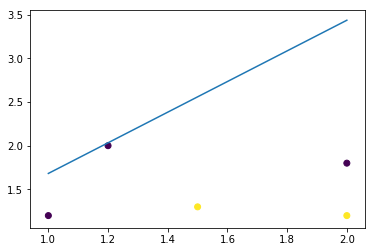

0.4


In [50]:
for i in range(5):
    w,b=update(x[i],y[i],w,b,eta)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print(acc(x,y,w,b))

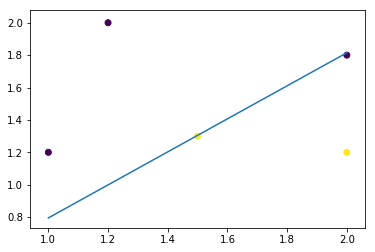

0.8


In [51]:
for i in range(5):
    w,b=update(x[i],y[i],w,b,eta)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print(acc(x,y,w,b))

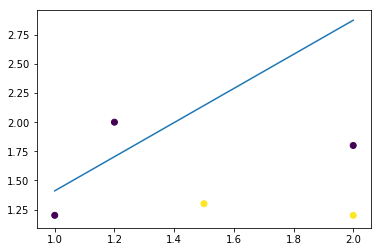

0.6


In [52]:
for i in range(5):
    w,b=update(x[i],y[i],w,b,eta)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print(acc(x,y,w,b))

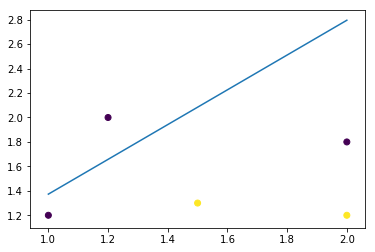

0.6


In [53]:
for i in range(5):
    w,b=update(x[i],y[i],w,b,eta)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print(acc(x,y,w,b))

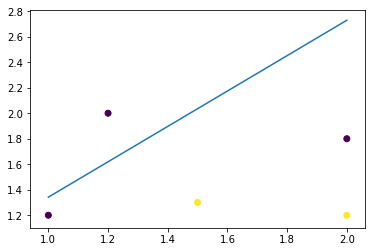

0.6


In [54]:
for i in range(5):
    w,b=update(x[i],y[i],w,b,eta)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print(acc(x,y,w,b))

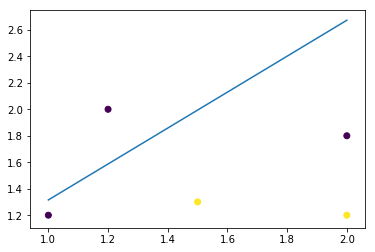

0.6


In [55]:
for i in range(5):
    w,b=update(x[i],y[i],w,b,eta)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print(acc(x,y,w,b))

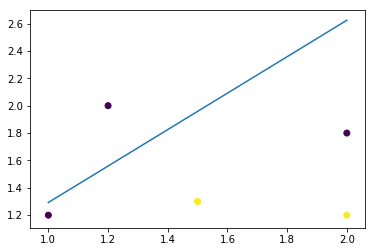

0.6


In [56]:
for i in range(5):
    w,b=update(x[i],y[i],w,b,eta)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print(acc(x,y,w,b))

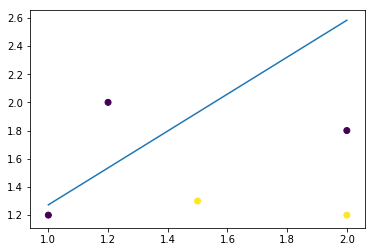

0.6


In [57]:
for i in range(5):
    w,b=update(x[i],y[i],w,b,eta)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
print(acc(x,y,w,b))

学習率やパラメータの初期値によって、学習の進み具合が変わることに注意しよう。

完全に分類が終わるまで、自動的に更新し続けるような関数を定義しよう。
パーセプトロン学習器のクラスを作る。

In [58]:
class Perceptron():
    def __init__(self,w,b,n_iter,eta):
        self.w=w
        self.b=b
        self.n_iter=n_iter
        self.eta=eta
    
    def fit(self,X,y):
        for i in range(self.n_iter):
            for j in range(y.shape[0]):
                if self.predict(X[j])==y[j]:
                    pass
                else:
                    self.w,self.b=self.w+self.eta*X[j]*y[j],self.b+self.eta*y[j]
                    
    def predict(self,x):
        if self.b+self.w.dot(x)>0:
            return 1
        else:
            return -1
    
    def acc(self,x,y):
        y_pred=np.array([self.predict(x[i],self.w,self.b) for i in range(5)])
        return (y==y_pred).sum()/y.shape[0]

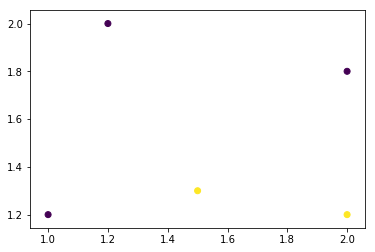

In [59]:
x, y=np.array([[1,1.2],[2,1.8],[1.2,2],[2,1.2],[1.5,1.3]]), np.array([-1,-1,-1,1,1])
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

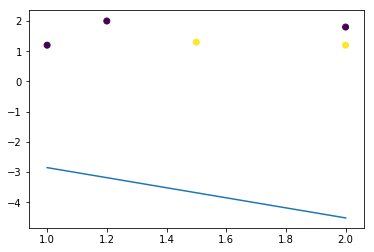

In [60]:
b=np.random.rand(1)
w=np.random.rand(2)
plotline(w,b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [61]:
clf=Perceptron(w,b,30,0.1)
clf.fit(x,y)

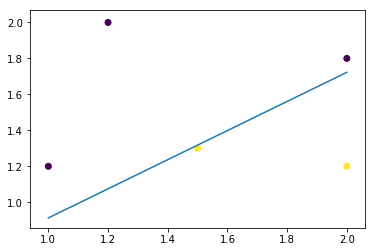

[-1, -1, -1, 1, 1]


In [62]:
plotline(clf.w,clf.b,plt)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

print([clf.predict(x[i]) for i in range(5)])

課題。
上で作った学習器を用いてirisデータの分類を行う。

In [63]:
from sklearn import datasets
iris=datasets.load_iris()

X,y=iris.data,iris.target

XX,yy=X[y!=2],y[y!=2] #今回は3クラスのうち2クラスだけ抜き取って分類する